In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import timedelta

In [38]:
# load in existing measurments
df = pd.read_csv("../../../Informatiekunde jaar 3/Leren & beslissen/General/Data/Houses/Houses1-19/House9-1m.csv")


In [40]:
# only for controlling in the end, not necessary for alliander
dfc = df
dfc['timestamp'] = pd.to_datetime(dfc.timestamp, format='%Y-%m-%d %H:%M:%S')
dfc['HH'] = dfc['timestamp'].dt.hour
dfc['Date'] = dfc['timestamp'].dt.date
dfc['Minute'] = dfc['timestamp'].dt.minute
dfc["Date"] = pd.to_datetime(dfc["Date"]).dt.strftime("%Y%m%d").astype(int)
dfc = dfc.set_index('timestamp')
dfc = dfc.loc['2020-04-08 04:00:00+02:00':'2020-04-09 03:59:00+02:00']
dfc = dfc.resample('5T').mean()
dfc

,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW,HH,Date,Minute
timestamp,,,,,,,,
2020-04-08 04:00:00+02:00,0.0,0.096,0.000,0.096,0.096,4,20200408,2
2020-04-08 04:05:00+02:00,0.0,0.144,0.000,0.144,0.144,4,20200408,7
2020-04-08 04:10:00+02:00,0.0,0.180,0.000,0.180,0.180,4,20200408,12
2020-04-08 04:15:00+02:00,0.0,0.168,0.000,0.168,0.168,4,20200408,17
2020-04-08 04:20:00+02:00,0.0,0.180,-0.012,0.180,0.192,4,20200408,22
...,...,...,...,...,...,...,...,...
2020-04-09 03:35:00+02:00,0.0,0.168,0.000,0.168,0.168,3,20200409,37
2020-04-09 03:40:00+02:00,0.0,0.180,0.000,0.180,0.180,3,20200409,42
2020-04-09 03:45:00+02:00,0.0,0.156,0.000,0.156,0.156,3,20200409,47


In [3]:
# preprosseing household data and set selecting training data as index, only selecting the existing data till 04:00 or 16:00
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df['HH'] = df['timestamp'].dt.hour
df['Date'] = df['timestamp'].dt.date
df['Minute'] = df['timestamp'].dt.minute
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d").astype(int)
df = df.set_index('timestamp')
df = df.loc['2020-04-01 04:00:00+02:00':'2020-04-08 03:59:00+02:00']
df

,house,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW,HH,Date,Minute
timestamp,,,,,,,,,
2020-04-01 04:00:00+02:00,House9,0.0,0.18,0.00,0.18,0.18,4,20200401,0
2020-04-01 04:01:00+02:00,House9,0.0,0.12,0.00,0.12,0.12,4,20200401,1
2020-04-01 04:02:00+02:00,House9,0.0,0.12,0.00,0.12,0.12,4,20200401,2
2020-04-01 04:03:00+02:00,House9,0.0,0.12,0.00,0.12,0.12,4,20200401,3
2020-04-01 04:04:00+02:00,House9,0.0,0.12,0.00,0.12,0.12,4,20200401,4
...,...,...,...,...,...,...,...,...,...
2020-04-08 03:55:00+02:00,House9,0.0,0.12,0.00,0.12,0.12,3,20200408,55
2020-04-08 03:56:00+02:00,House9,0.0,0.06,-0.06,0.06,0.12,3,20200408,56
2020-04-08 03:57:00+02:00,House9,0.0,0.12,0.00,0.12,0.12,3,20200408,57


In [4]:
df_weather = pd.read_csv("../../../Informatiekunde jaar 3/Leren & beslissen/General/Data/Weather/weather_data.csv")
df_weather = df_weather.drop(columns=['    Y', '    O', '    S', '    R', '    M', '   WW', '    N', '   VV', '    P', 'Unnamed: 0', '  STN', '   IX', '   DD', '   FH', '   FF', '   FX', ' T10N', '   TD', '   DR', '   RH', '    U'])
df_weather = df_weather.rename(columns={"YYYYMMDD": "Date", '   HH':"HH"})
df_weather

,Date,HH,T,SQ,Q
0,20180801,1,125,0,0
1,20180801,2,127,0,0
2,20180801,3,124,0,0
3,20180801,4,116,0,0
4,20180801,5,133,5,15
...,...,...,...,...,...
18283,20200831,20,138,0,0
18284,20200831,21,129,0,0
18285,20200831,22,124,0,0
18286,20200831,23,112,0,0


In [34]:
#select weather data for the next 24 hours, only three useful features (T, SQ, Q) for predictions
next_hour = df["HH"].iloc[-1]+1
current_date = df['Date'].iloc[-1]
df_2 = df_weather.loc[(df_weather['HH'] == next_hour) & (df_weather['Date'] == current_date)]
index = np.linspace(int(df_2.index.values), int(df_2.index.values)+23)
df_predict = df_weather[df_weather.index.isin(index)]
df_predict

,Date,HH,T,SQ,Q
14787,20200408,4,45,0,0
14788,20200408,5,48,0,0
14789,20200408,6,72,7,20
14790,20200408,7,106,5,59
14791,20200408,8,142,10,105
14792,20200408,9,176,10,172
14793,20200408,10,202,10,212
14794,20200408,11,205,10,240
14795,20200408,12,224,10,255
14796,20200408,13,229,10,246


In [6]:
# set the household data per hour
df_house = df.groupby(['Date', 'HH'])['EXPORT_KW'].mean().reset_index()
df_house.loc[df_house["HH"] == 0, 'HH'] = 24
df_house

,Date,HH,EXPORT_KW
0,20200401,4,0.000
1,20200401,5,0.000
2,20200401,6,0.000
3,20200401,7,0.000
4,20200401,8,0.204
...,...,...,...
163,20200407,23,0.000
164,20200408,24,0.000
165,20200408,1,0.000
166,20200408,2,0.000


In [7]:
df_training = pd.merge(df_weather, df_house, on=["Date", "HH"])
df_training

,Date,HH,T,SQ,Q,EXPORT_KW
0,20200401,4,-41,0,0,0.000
1,20200401,5,-43,0,0,0.000
2,20200401,6,-26,7,21,0.000
3,20200401,7,12,7,62,0.000
4,20200401,8,42,0,54,0.204
...,...,...,...,...,...,...
163,20200407,24,77,0,0,0.000
164,20200408,1,66,0,0,0.000
165,20200408,2,56,0,0,0.000
166,20200408,3,50,0,0,0.000


In [8]:
# all the data that the model can predict on
X_train = df_training[['   SQ', '    Q', '    T']].values
X_test = df_predict[['   SQ', '    Q', '    T']].values
Y_train = df_training['EXPORT_KW'].values.reshape(-1,1)

In [27]:
def polynomial(X, degree):
    poly = PolynomialFeatures(degree) 
    poly.fit(X)
    X_poly = poly.transform(X)
    return X_poly

# def rmse(y_true, y_pred):
#     RMSE = 0
#     for prediction, true in zip(y_pred, y_true):
#         RMSE += (true - prediction)**2
    
#     return (RMSE/len(y_true))**0.5

# Generate polynomial dataset (both training and test)
poly_train = polynomial(X_train, 4)
poly_test = polynomial(X_test, 4)
    
# Scale all features using the RobustScaler
scaler = RobustScaler().fit(poly_train)
poly_train_scaled = scaler.transform(poly_train)
    
scaler = RobustScaler().fit(poly_test)
poly_test_scaled = scaler.transform(poly_test)

# Compute and print RMSE using your code above on the training set and on the test set
lr = LinearRegression().fit(poly_train_scaled, Y_train)
Y_poly_pred_train = lr.predict(poly_train_scaled)  
Y_poly_pred_test = lr.predict(poly_test_scaled)
# train_rmse= rmse(Y_train, Y_poly_pred_train)
# test_rmse= rmse(Y_test, Y_poly_pred_test)

# print('RMSE for the training set for degree 4 is: ', train_rmse)
# print('RMSE for the test set for degree 4 is: ', test_rmse)



In [32]:
Y_pred_5minutes = np.repeat(Y_poly_pred_test,12)
# setting all negative values to 0
Y_pred_5minutes = [0 if i < 0 else i for i in Y_pred_5minutes]
df_prediction_export = pd.DataFrame(Y_pred_5minutes, columns = ['prediction_EXPORT_KW'])
df_prediction_export['timestamp'] = pd.date_range(start=df.index[-1]+ timedelta(minutes=1), periods=len(df_prediction_export), freq='5T')
df_prediction_export.set_index('timestamp', inplace = True)
df_prediction_export.index= pd.to_datetime(df_prediction_export.index)
df_prediction_export

,prediction_EXPORT_KW
timestamp,
2020-04-08 04:00:00+02:00,0.109215
2020-04-08 04:05:00+02:00,0.109215
2020-04-08 04:10:00+02:00,0.109215
2020-04-08 04:15:00+02:00,0.109215
2020-04-08 04:20:00+02:00,0.109215
...,...
2020-04-09 03:35:00+02:00,0.109863
2020-04-09 03:40:00+02:00,0.109863
2020-04-09 03:45:00+02:00,0.109863


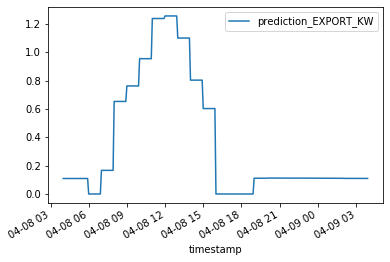

In [31]:
df_prediction_export.plot()

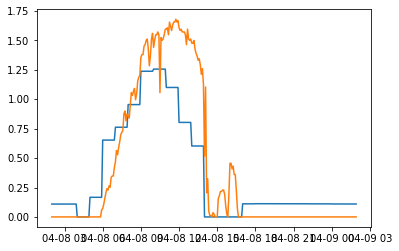

In [42]:
plt.plot(df_prediction_export)
plt.plot(dfc['EXPORT_KW'])